Top 50 violation types: if two violation types, one of them is 'speeding over limit' or 'Speeding-10% or More Above Posted Speed (#)'.

Explore violation types

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
import os 
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
year = 2016
vio_cutoff = 50
print('Processing: ',year)
df = pd.read_parquet('/gdrive/MyDrive/traffic_stop/year_data/traffic_' + str(year) + '.parquet')

top_vios = list(df['violation'].value_counts(dropna=False)[:vio_cutoff].index)
print(top_vios)
df['violation'].value_counts(dropna=False)[:vio_cutoff]

Processing:  2016
['Speeding Over Limit (#)', 'Speeding-10% or More Above Posted Speed (#)', 'Operate Motor Vehicle Without License Plates (Or With One Plate)', 'No/Non-Compliant Head Lamps (#)', 'Display Expired License Plates/Registration (#)', 'No/Improper License Plate Lamp', 'Improperly Placed Or Obstructed License Plate (#)', 'Operate Motor Vehicle in Violation of FMVSS 571.108', 'Ride, Not Secured By Safety Belt-Driver (12-1-85) (#)', 'Inoperable/Obscured Stop Lamp(s) (#)', 'Drive in Left Lane When Not Passing or Where Prohibited', 'Speeding Over Limit (#)|No DL When Unlicensed-Not CDL', 'No/Improper Tail Lamp - not Motorcycle', 'Speeding Over Limit (#)|Driving While License Invalid - DL', 'No DL When Unlicensed-Not CDL|Speeding-10% or More Above Posted Speed (#)', 'Ride, Not Secured By Safety Belt-Passenger (When Required)', 'Display Expired License Plates/Registration (#)|Speeding Over Limit (#)', 'Operate Motor Vehicle Without License Plates (Or With One Plate)|Speeding Over 

Speeding Over Limit (#)                                                                                         552698
Speeding-10% or More Above Posted Speed (#)                                                                     226539
Operate Motor Vehicle Without License Plates (Or With One Plate)                                                 57819
No/Non-Compliant Head Lamps (#)                                                                                  40423
Display Expired License Plates/Registration (#)                                                                  29326
No/Improper License Plate Lamp                                                                                   29260
Improperly Placed Or Obstructed License Plate (#)                                                                27973
Operate Motor Vehicle in Violation of FMVSS 571.108                                                              20924
Ride, Not Secured By Safety Belt-Driver (12-1-85

In [ ]:
[vio for vio in top_vios if '|' in vio]

['Speeding Over Limit (#)|No DL When Unlicensed-Not CDL',
 'Speeding Over Limit (#)|Driving While License Invalid - DL',
 'No DL When Unlicensed-Not CDL|Speeding-10% or More Above Posted Speed (#)',
 'Display Expired License Plates/Registration (#)|Speeding Over Limit (#)',
 'Operate Motor Vehicle Without License Plates (Or With One Plate)|Speeding Over Limit (#)',
 'Fail To Report Change Of Address/Name|Speeding Over Limit (#)',
 'Fail to Maintain Financial Responsibility (#)|Speeding Over Limit (#)',
 'Fail to Maintain Financial Responsibility (#)|Speeding-10% or More Above Posted Speed (#)',
 'Fail To Display Driver License|Speeding Over Limit (#)',
 'Drive in Left Lane When Not Passing or Where Prohibited|Speeding Over Limit (#)',
 'Display Expired License Plates/Registration (#)|Speeding-10% or More Above Posted Speed (#)',
 'Fail To Report Change Of Address/Name|Speeding-10% or More Above Posted Speed (#)',
 'Driving While License Invalid - DL|Speeding-10% or More Above Posted Sp

### Filter violation types

In [ ]:
year_present_vios = {}
years = list(range(2006, 2018))
# get number of years in which a specific violation have more than 5000 records
for year in years:
  print('Processing: ',year)
  df = pd.read_parquet('/gdrive/MyDrive/traffic_stop/year_data/traffic_' + str(year) + '.parquet')

  cnt_df = pd.DataFrame(df['violation'].value_counts(dropna=False))
  cnt_df = cnt_df.loc[cnt_df['violation'] > 5000]
  single_vio_lst = [vio for vio in list(cnt_df.index) if '|' not in vio]

  for vio in single_vio_lst:
    if vio not in year_present_vios:
      year_present_vios[vio] = 1
    else:
      year_present_vios[vio] += 1

Processing:  2006
Processing:  2007
Processing:  2008
Processing:  2009
Processing:  2010
Processing:  2011
Processing:  2012
Processing:  2013
Processing:  2014
Processing:  2015
Processing:  2016
Processing:  2017


In [ ]:
year_present_vios

{'Affix Unauthorized Sunscreening Device To Motor Vehicle': 6,
 'DWI-1st Offense': 7,
 'Display Expired License Plates/Registration (#)': 12,
 'Disregard Red Light-traffic Signal': 4,
 'Disregard Stop Sign (#)': 12,
 'Drive On Improved Shoulder When Prohibited': 12,
 'Drive Without Lights-when Required': 7,
 'Drive in Left Lane When Not Passing or Where Prohibited': 12,
 'Driving While License Invalid - DL': 1,
 'Fail To Control Speed (#)': 12,
 'Fail To Drive In Single Lane (#)': 12,
 'Fail To Signal Lane Change': 12,
 'Fail To Stop At Designated Point At Stop Sign': 2,
 'Fail to Maintain Financial Responsibility (#)': 3,
 'Fail to Move Over or Slow Down for Certain Vehicles': 12,
 'Failure to Pay Toll (For NTTA Use Only)': 5,
 'Following Too Closely': 12,
 'Improperly Placed Or Obstructed License Plate (#)': 12,
 'Inoperable/Obscured Head Lamp(s)': 1,
 'Inoperable/Obscured Stop Lamp(s) (#)': 12,
 'No Valid Inspection Certificate-Expired (#)': 10,
 'No/Improper Clearance Lamp': 4,
 'N

In [ ]:
def check_vio_yearly_cnt(violation):
  print('**************************')
  print(violation)
  for year in years:
    df = pd.read_parquet('/gdrive/MyDrive/traffic_stop/year_data/traffic_' + str(year) + '.parquet')
    df = df.loc[df['violation'] == violation,:]
    print(year, ': ', len(df))

We have 22 single violation types having > 5000 records in **all** years.
-> we focus on this violation types.

We have 16 single violation types having > 5000 records in some years.

In [ ]:
check_vios = [] 
all_year_vios = []
for vio, cnt in year_present_vios.items():
  if cnt < 12:
    check_vios.append(vio)
  else:
    all_year_vios.append(vio)
print(len(check_vios))
print(len(all_year_vios))

16
22


#### Violation Types with number of records not > 5000 in all years

**Violation Types with number of records not > 5000 in all years:**

No Valid Inspection Certificate-Expired (#): Not in 2016/2017

DWI-1st Offense: # of records decreasing each year, drop below 5000 in 2013-2017

Fail to Maintain Financial Responsibility: # of records decreasing each year, drop below 5000 since 2009

No/Improper Clearance Lamp: # of records decreasing each year, drop below 5000 since 2010

Driving While License Invalid - DL: # of records > 5000 only in 2006

Use Equipment Not Approved (Specify)(#):
below 5000 in 2007, 2014-2017

No/Improper ID Lamp: < 5000 since 2012

Afiix Unauthorized Sunscreening Device To Motor Vehicle: fluctuating

Open Container in Motor Vehicle - Passenger (#):
fluctuating

Drive Without Lights-when Required: increasing trend

Warrant Served - Misdemeanor: fluctuating

Fail To Stop At Designated Point At Stop Sign: fluctuating

Failure to Pay Toll (For NTTA Use Only): recorded since 2012

Disregard Red Light-traffic Signal: fluctuating

Inoperable/Obscured Head Lamp(s): fluctuating

Operate Motor Vehicle in Violation of FMVSS 571.108: recorded since 2014


In [ ]:
for vio in check_vios:
  check_vio_yearly_cnt(vio)

**************************
No Valid Inspection Certificate-Expired (#)
2006 :  20341
2007 :  19130
2008 :  19475
2009 :  19162
2010 :  30927
2011 :  34553
2012 :  37008
2013 :  40921
2014 :  40025
2015 :  7871
2016 :  0
2017 :  0
**************************
DWI-1st Offense
2006 :  7861
2007 :  7808
2008 :  6705
2009 :  5311
2010 :  5319
2011 :  5506
2012 :  5489
2013 :  4971
2014 :  4677
2015 :  3955
2016 :  3867
2017 :  4039
**************************
Fail to Maintain Financial Responsibility (#)
2006 :  6698
2007 :  5775
2008 :  5841
2009 :  3389
2010 :  3194
2011 :  2706
2012 :  2384
2013 :  2263
2014 :  1636
2015 :  1334
2016 :  1411
2017 :  1474
**************************
No/Improper Clearance Lamp
2006 :  6360
2007 :  5731
2008 :  6722
2009 :  5709
2010 :  4048
2011 :  3329
2012 :  2624
2013 :  1895
2014 :  1883
2015 :  1951
2016 :  1695
2017 :  1348
**************************
Driving While License Invalid - DL
2006 :  5469
2007 :  4978
2008 :  2498
2009 :  1739
2010 :  2279
2011 

#### Violation Types with number of records > 5000 in all years

In [ ]:
# raw counts do not remove unknown/empty values as in logistic regression
def cal_cnt_cite(year, violation_types, county=None):
  print('Processing: ',year)
  df = pd.read_parquet('/gdrive/MyDrive/traffic_stop/year_data/traffic_' + str(year) + '.parquet')
  if county:
    df = df.loc[df['county_name']==county,:]

  # store demographic counts in stops
  stop_race_df = pd.DataFrame()
  # store demographic counts in citations/no-citations
  cite_race_df = pd.DataFrame()

  total_stops = []
  violations = []
  citation_rates = []
  citations = []

  for vio in violation_types:
    temp_df = df.loc[df['violation']==vio,:]

    citation_rate = round(temp_df['citation_issued'].value_counts(dropna=False, normalize = True)[True],4)
    # only want violation categories with citation rates extremely low or extremely high
    #if (citation_rate > 0.05) and (citation_rate < 0.9):
      #continue

    violations.append(vio)
    total_stops.append(len(temp_df))
    citation_rates.append(citation_rate)
    citations.append(round(temp_df['citation_issued'].value_counts(dropna=False, normalize = False)[True],4))

    temp_stop_race_df = pd.DataFrame(temp_df['subject_race'].value_counts(dropna=True, normalize = False)).transpose()
    temp_stop_race_df['violation'] = vio
    temp_stop_race_df.rename(columns = {'white':'stop_white','hispanic':'stop_hispanic','black':'stop_black','unknown':'stop_unknwon','asian/pacific islander':'stop_asian/pacific islander','other':'stop_other'},inplace = True)
    stop_race_df = pd.concat([stop_race_df,temp_stop_race_df],ignore_index = True)
    

    # filter: only keep violations with citation_rate > 0.9 or < 0.05
    #if citation_rate > 0.9:
      #cite_df = temp_df.loc[temp_df['citation_issued']==False,:]
    #elif citation_rate < 0.05:
      #cite_df = temp_df.loc[temp_df['citation_issued']==True,:]
    cite_df = temp_df.loc[temp_df['citation_issued']==True,:]

    # if race is NAN we drop it
    vio_race_df = pd.DataFrame(cite_df['subject_race'].value_counts(dropna=True, normalize = False)).transpose()
    vio_race_df['violation'] = vio
    cite_race_df = pd.concat([cite_race_df,vio_race_df],ignore_index = True)

  output_df = pd.DataFrame({'violation':violations,'total_stops':total_stops,'citations':citations,'citation_rate':citation_rates})
  output_df = output_df.merge(cite_race_df, how='inner', on='violation')
  output_df = output_df.merge(stop_race_df, how='inner', on='violation')
  output_df['year'] = [year]*len(output_df)
  #return output_df.sort_values(by = 'citation_rate', ascending = False)
  return output_df

In [ ]:
years = list(range(2006,2018))
res_df = pd.DataFrame()
for year in years:
  # get each year's top 30
  cite_rate_df = cal_cnt_cite(year, all_year_vios)
  res_df = pd.concat([res_df,cite_rate_df],ignore_index = True)
res_df

Processing:  2006
Processing:  2007
Processing:  2008
Processing:  2009
Processing:  2010
Processing:  2011
Processing:  2012
Processing:  2013
Processing:  2014
Processing:  2015
Processing:  2016
Processing:  2017


,violation,total_stops,citations,citation_rate,white,hispanic,black,asian/pacific islander,unknown,other,stop_white,stop_hispanic,stop_black,stop_asian/pacific islander,stop_unknwon,stop_other,year
0,Speeding Over Limit (#),767317,1963,0.0026,1382,388,154,24,12,3,568861,120527,66107,6573,4772,477,2006
1,Speeding-10% or More Above Posted Speed (#),457629,455316,0.9949,310761,86572,43969,8268,5264,482,312522,86815,44246,8291,5270,485,2006
2,No/Improper License Plate Lamp,74549,33,0.0004,20,8,4,0,1,0,48779,17329,7588,437,385,31,2006
3,"Ride, Not Secured By Safety Belt-Driver (12-1-...",64432,64251,0.9972,44391,12469,6580,391,379,41,44504,12504,6612,392,379,41,2006
4,Operate Motor Vehicle Without License Plates (...,60842,427,0.0070,313,59,41,5,8,1,43219,11244,5308,602,436,33,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Inoperable/Obscured Stop Lamp(s) (#),19478,57,0.0029,18,31,8,0,0,0,7072,9696,2318,368,0,24,2017
260,Use Of Vision Reducing Matter On Windows - Gla...,12519,3404,0.2719,1022,2120,246,16,0,0,2970,8673,824,51,0,1,2017
261,Unsafe Speed (#),6152,6010,0.9769,3424,1805,637,133,0,11,3477,1878,649,137,0,11,2017
262,Fail To Control Speed (#),8733,8605,0.9853,5418,2204,772,200,0,11,5475,2263,782,202,0,11,2017


In [ ]:
22*12

264

### Visualize citation rates and discrepancy in citation rates

In [ ]:
cite_cols = ['white','hispanic','black','asian/pacific islander']
stop_cols = [('stop_' + col) for col in cite_cols]
rate_cols = [('rate_' + col) for col in cite_cols]

for cite, stop in zip(cite_cols,stop_cols):
  res_df[('rate_' + cite)] = round(res_df[cite]/res_df[stop],4)

res_df['discrepancy'] = res_df[rate_cols].max(axis = 1) - res_df[rate_cols].min(axis = 1)

res_df.head()

,violation,total_stops,citations,citation_rate,white,hispanic,black,asian/pacific islander,unknown,other,...,stop_black,stop_asian/pacific islander,stop_unknwon,stop_other,year,rate_white,rate_hispanic,rate_black,rate_asian/pacific islander,discrepancy
0,Speeding Over Limit (#),767317,1963,0.0026,1382,388,154,24,12,3,...,66107,6573,4772,477,2006,0.0024,0.0032,0.0023,0.0037,0.0014
1,Speeding-10% or More Above Posted Speed (#),457629,455316,0.9949,310761,86572,43969,8268,5264,482,...,44246,8291,5270,485,2006,0.9944,0.9972,0.9937,0.9972,0.0035
2,No/Improper License Plate Lamp,74549,33,0.0004,20,8,4,0,1,0,...,7588,437,385,31,2006,0.0004,0.0005,0.0005,0.0000,0.0005
3,"Ride, Not Secured By Safety Belt-Driver (12-1-...",64432,64251,0.9972,44391,12469,6580,391,379,41,...,6612,392,379,41,2006,0.9975,0.9972,0.9952,0.9974,0.0023
4,Operate Motor Vehicle Without License Plates (...,60842,427,0.0070,313,59,41,5,8,1,...,5308,602,436,33,2006,0.0072,0.0052,0.0077,0.0083,0.0031


In [ ]:
output_path = '0412_raw_cnt_allcounties_yearly.csv'
res_df.to_csv(output_path, index=False)

#### Check citation rates

In [ ]:
res_df.loc[res_df['year']==2016,:].sort_values(by = 'citation_rate')

,violation,total_stops,citations,citation_rate,white,hispanic,black,asian/pacific islander,unknown,other,...,stop_black,stop_asian/pacific islander,stop_unknwon,stop_other,year,rate_white,rate_hispanic,rate_black,rate_asian/pacific islander,discrepancy
222,No/Improper License Plate Lamp,29260,6,0.0002,2,4,0,0,0,0,...,2909,417,0,30,2016,0.0002,0.0003,0.0000,0.0000,0.0003
225,No/Non-Compliant Head Lamps (#),40423,31,0.0008,12,14,3,2,0,0,...,4304,621,0,31,2016,0.0006,0.0009,0.0007,0.0032,0.0026
220,Speeding Over Limit (#),552698,1040,0.0019,601,344,75,18,0,2,...,48395,8201,1,477,2016,0.0018,0.0020,0.0015,0.0022,0.0007
237,Inoperable/Obscured Stop Lamp(s) (#),16441,42,0.0026,15,23,3,1,0,0,...,1666,326,0,6,2016,0.0023,0.0029,0.0018,0.0031,0.0013
229,No/Improper Tail Lamp - not Motorcycle,12812,48,0.0037,19,24,4,1,0,0,...,1209,182,0,9,2016,0.0030,0.0048,0.0033,0.0055,0.0025
241,Drive in Left Lane When Not Passing or Where P...,16205,94,0.0058,37,47,8,2,0,0,...,2108,369,0,29,2016,0.0054,0.0069,0.0038,0.0054,0.0031
226,Improperly Placed Or Obstructed License Plate (#),27973,181,0.0065,63,91,24,3,0,0,...,3094,293,0,24,2016,0.0064,0.0062,0.0078,0.0102,0.0040
224,Operate Motor Vehicle Without License Plates (...,57819,597,0.0103,311,223,52,11,0,0,...,5548,1185,0,37,2016,0.0100,0.0111,0.0094,0.0093,0.0018
228,No/Improper Mud Flap,6644,73,0.0110,25,41,6,1,0,0,...,653,36,0,1,2016,0.0076,0.0154,0.0092,0.0278,0.0202
232,Fail To Signal Lane Change,9966,134,0.0134,61,57,10,5,0,1,...,1082,258,0,14,2016,0.0134,0.0141,0.0092,0.0194,0.0102


Citation Rates and Discrepancies:

Speeding-10% or More Above Posted Speed (#): discrepancy in citation rate is increasing over years. asian/pacific islander highest. hispanic/white lowest

No/Improper License Plate Lamp: Extremely high citation rate for asian/pacific islander in 2010.

Ride, Not Secured By Safety Belt-Driver (12-1-85) (#): citation rate decreases over the years.

Operate Motor Vehicle Without License Plates (Or With One Plate): very high aisan citation rate in 07, 08, 11, 12, 14

No/Non-Compliant Head Lamps (#): very high asian citation rate in 06 (**Raw citation count: cahnge from 7 to 1**)

Improperly Placed Or Obstructed License Plate (#): very high asian citation rate in 13 (**Raw citation count: 8-14**)

Fail To Signal Lane Change: high asian citation rate over years (**Raw Count of Asian stopped is only 10% of that of black people**)

Fail to Move Over or Slow Down for Certain Vehicles: high asian rates(**Raw Count of Asian stopped is only 10% of that of black people**)

In [ ]:
res_df.loc[res_df['violation'] == 'Fail to Move Over or Slow Down for Certain Vehicles',:]

,violation,total_stops,citations,citation_rate,white,hispanic,black,asian/pacific islander,unknown,other,...,stop_black,stop_asian/pacific islander,stop_unknwon,stop_other,year,rate_white,rate_hispanic,rate_black,rate_asian/pacific islander,discrepancy
16,Fail to Move Over or Slow Down for Certain Veh...,11510,1623,0.1410,1146,272,160,30,13,2,...,1425,176,130,7,2006,0.1466,0.1391,0.1123,0.1705,0.0582
38,Fail to Move Over or Slow Down for Certain Veh...,8999,1249,0.1388,850,248,111,28,12,0,...,1009,214,158,6,2007,0.1465,0.1371,0.1100,0.1308,0.0365
60,Fail to Move Over or Slow Down for Certain Veh...,9158,1144,0.1249,806,141,93,43,58,3,...,902,230,502,9,2008,0.1330,0.0970,0.1031,0.1870,0.0900
82,Fail to Move Over or Slow Down for Certain Veh...,11385,1680,0.1476,923,466,153,81,55,2,...,1242,434,449,5,2009,0.1522,0.1460,0.1232,0.1866,0.0634
104,Fail to Move Over or Slow Down for Certain Veh...,12466,1539,0.1235,848,412,146,68,62,3,...,1387,421,586,14,2010,0.1309,0.1151,0.1053,0.1615,0.0562
126,Fail to Move Over or Slow Down for Certain Veh...,12254,1452,0.1185,782,390,147,72,58,3,...,1350,395,551,16,2011,0.1252,0.1056,0.1089,0.1823,0.0767
148,Fail to Move Over or Slow Down for Certain Veh...,10917,1628,0.1491,892,445,143,72,72,4,...,1227,396,473,14,2012,0.1548,0.1461,0.1165,0.1818,0.0653
170,Fail to Move Over or Slow Down for Certain Veh...,9137,1508,0.1650,811,431,144,66,51,5,...,959,322,366,27,2013,0.1665,0.1663,0.1502,0.2050,0.0548
192,Fail to Move Over or Slow Down for Certain Veh...,7641,1508,0.1974,823,382,144,66,89,4,...,683,243,375,27,2014,0.2081,0.1620,0.2108,0.2716,0.1096
214,Fail to Move Over or Slow Down for Certain Veh...,6799,1291,0.1899,605,408,116,60,96,6,...,585,197,397,22,2015,0.1950,0.1635,0.1983,0.3046,0.1411


#### citation rates and discrepancy

************************
Speeding Over Limit (#)


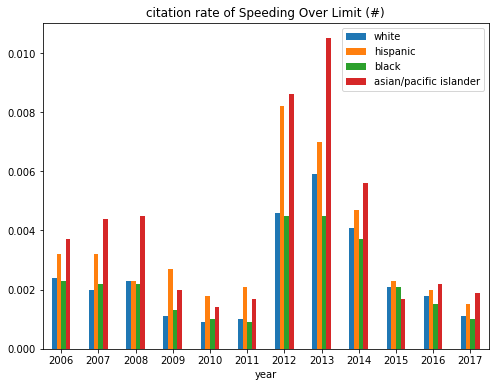

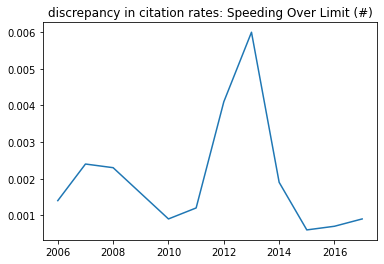

************************
Speeding-10% or More Above Posted Speed (#)


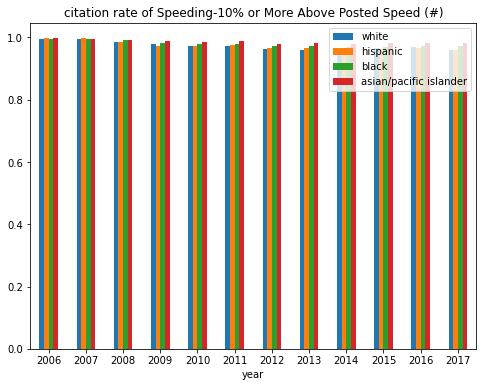

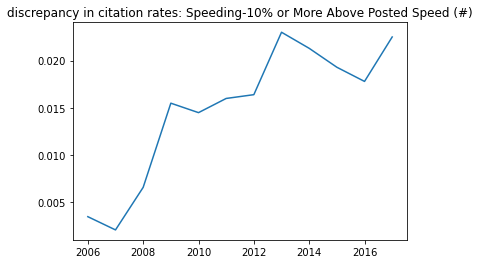

************************
No/Improper License Plate Lamp


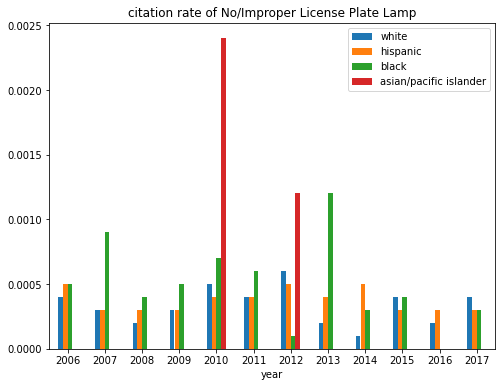

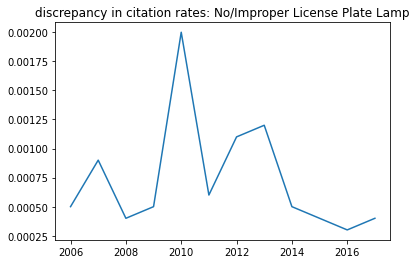

************************
Ride, Not Secured By Safety Belt-Driver (12-1-85) (#)


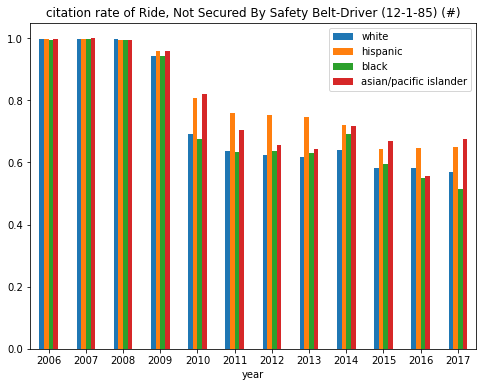

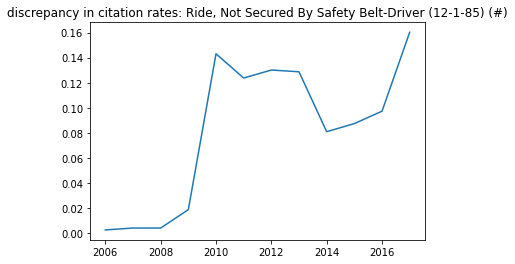

************************
Operate Motor Vehicle Without License Plates (Or With One Plate)


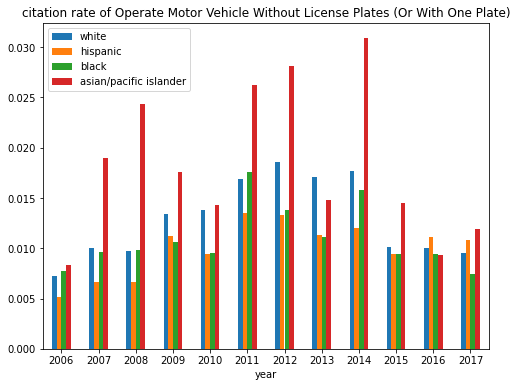

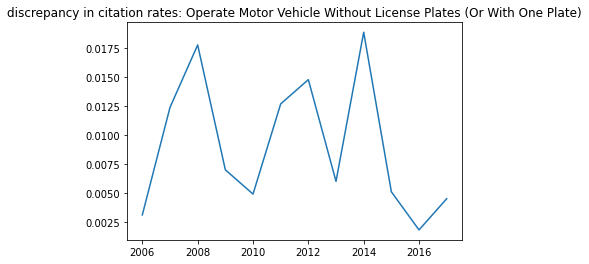

************************
No/Non-Compliant Head Lamps (#)


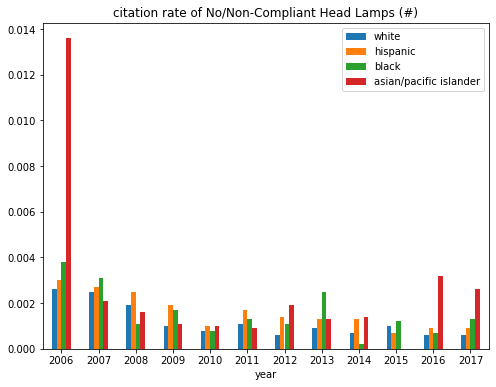

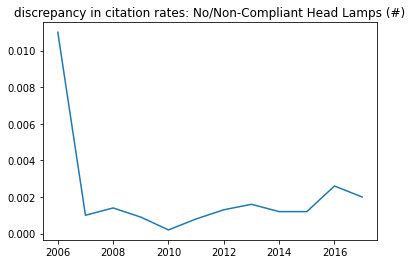

************************
Improperly Placed Or Obstructed License Plate (#)


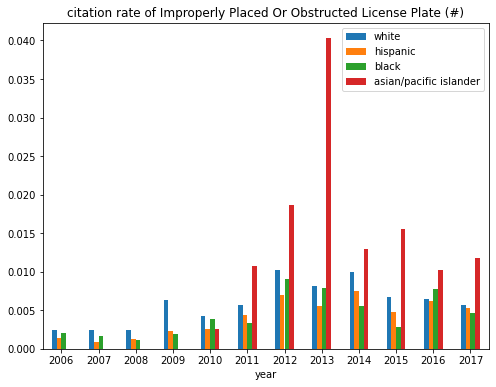

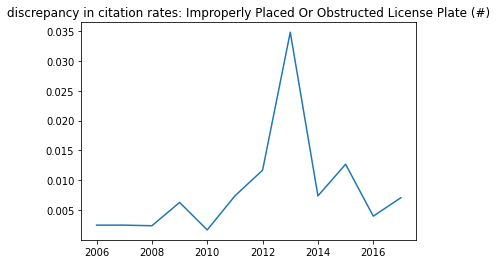

************************
Display Expired License Plates/Registration (#)


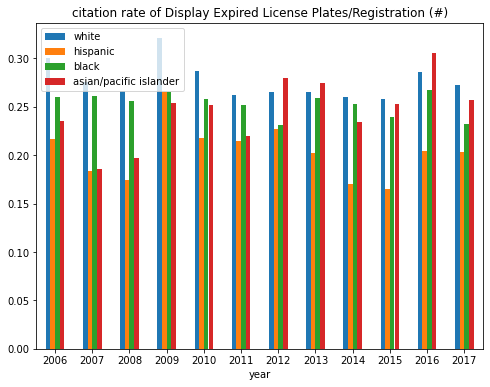

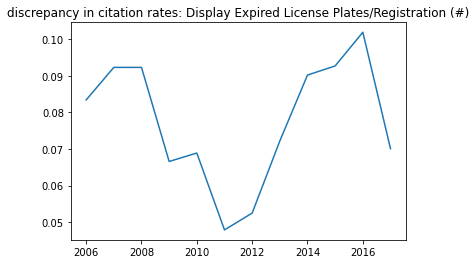

************************
No/Improper Mud Flap


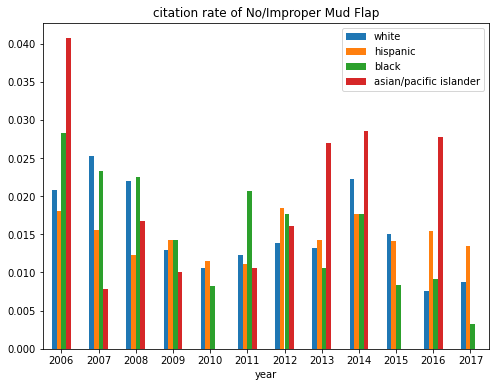

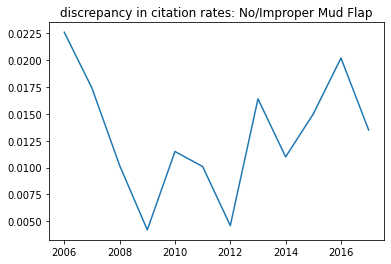

************************
No/Improper Tail Lamp - not Motorcycle


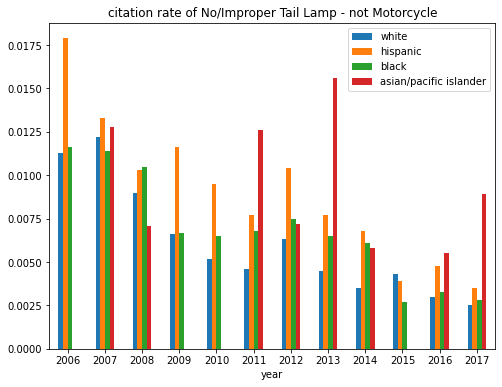

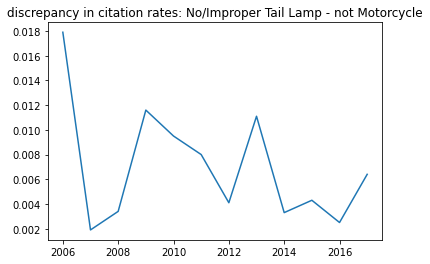

************************
Following Too Closely


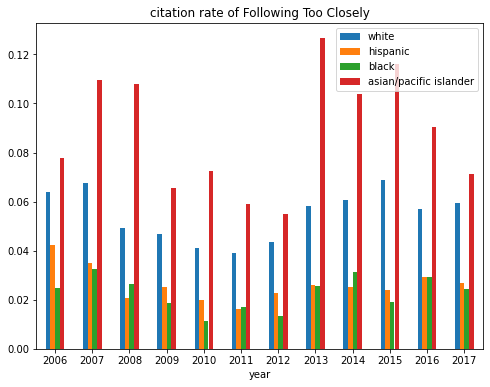

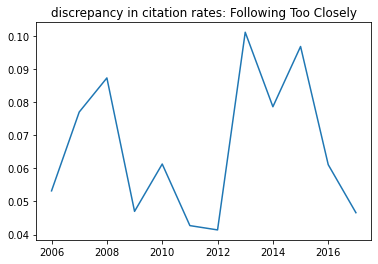

************************
Drive On Improved Shoulder When Prohibited


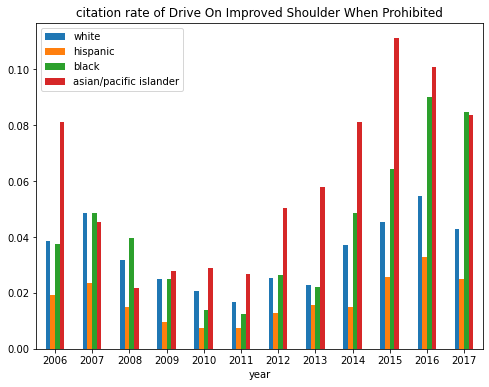

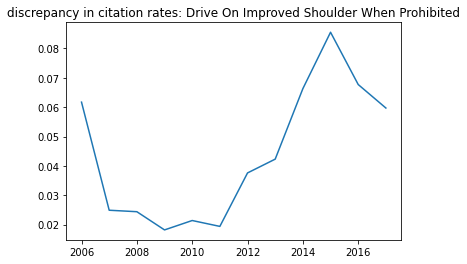

************************
Fail To Signal Lane Change


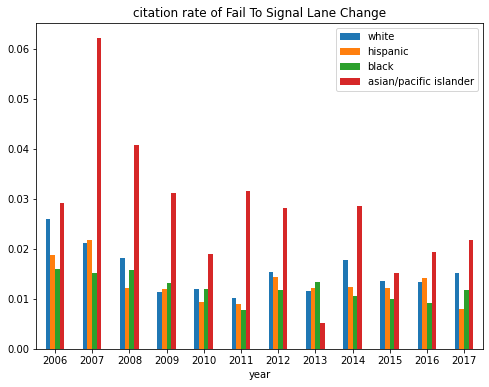

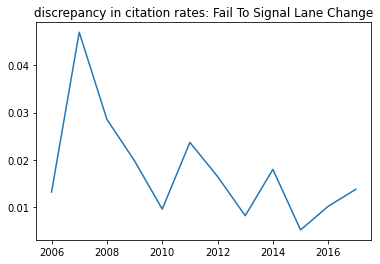

************************
Disregard Stop Sign (#)


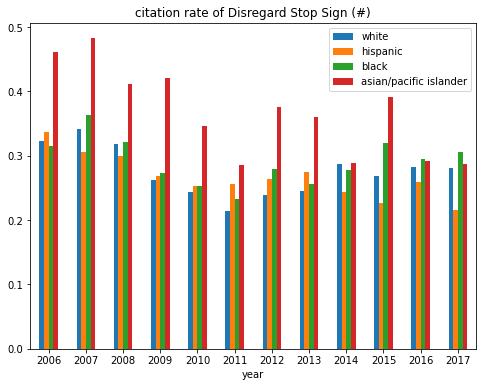

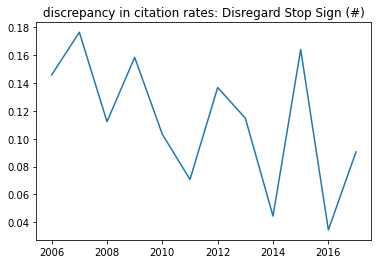

************************
Fail To Drive In Single Lane (#)


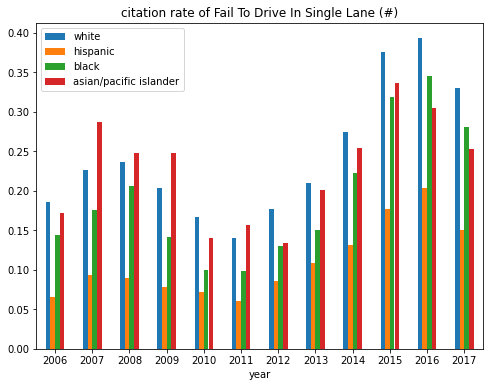

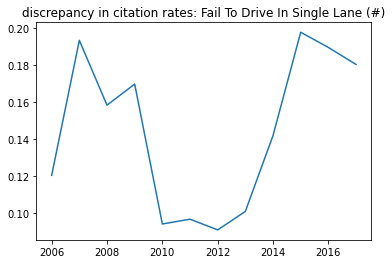

************************
Ride, Not Secured By Safety Belt-Passenger (When Required)


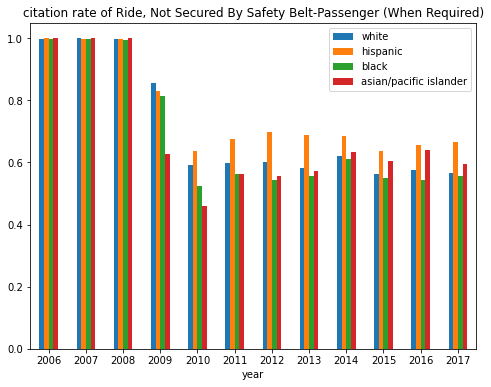

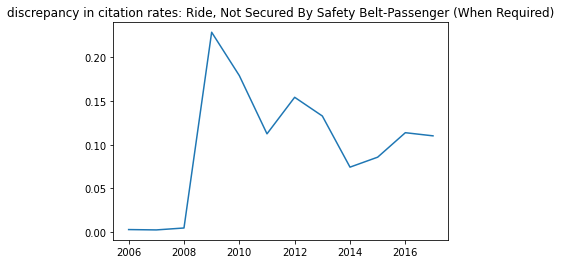

************************
Fail to Move Over or Slow Down for Certain Vehicles


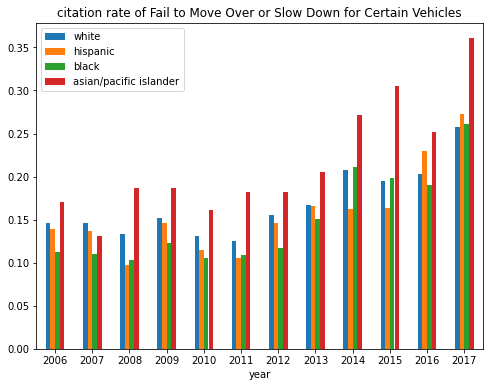

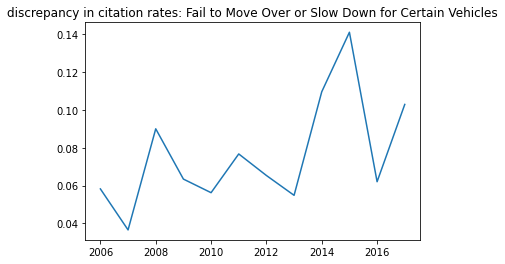

************************
Inoperable/Obscured Stop Lamp(s) (#)


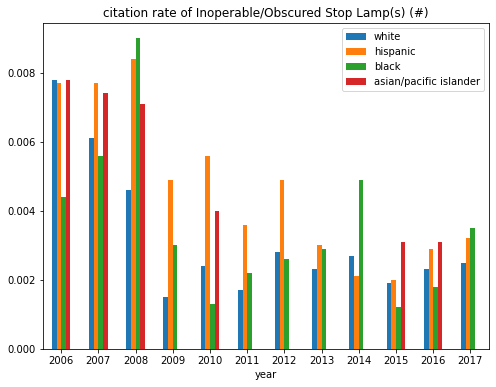

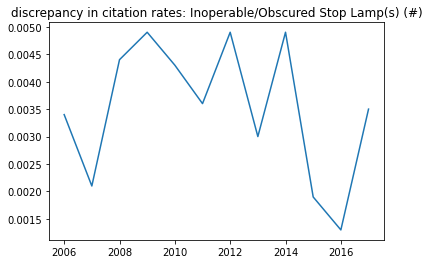

************************
Use Of Vision Reducing Matter On Windows - Glass Coating Material


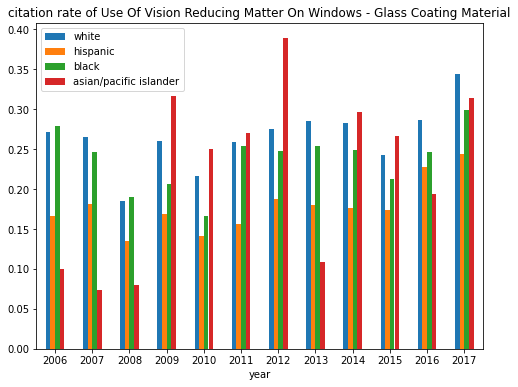

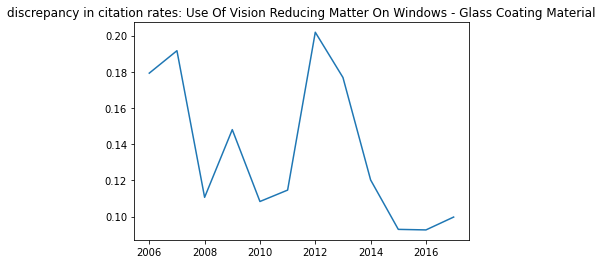

************************
Unsafe Speed (#)


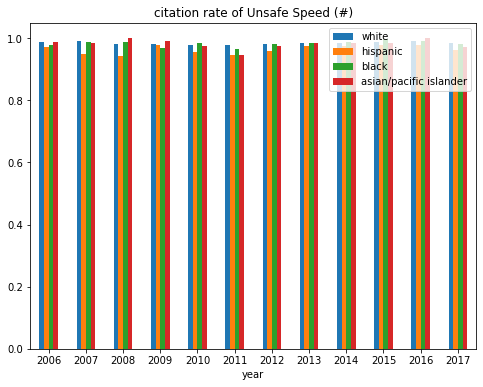

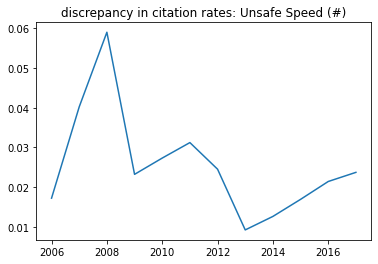

************************
Fail To Control Speed (#)


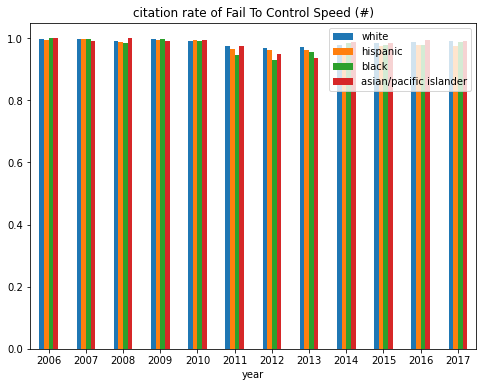

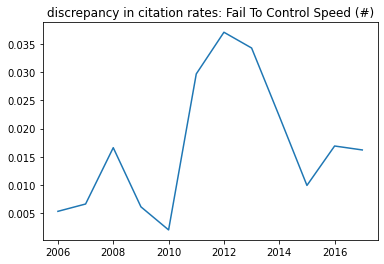

************************
Drive in Left Lane When Not Passing or Where Prohibited


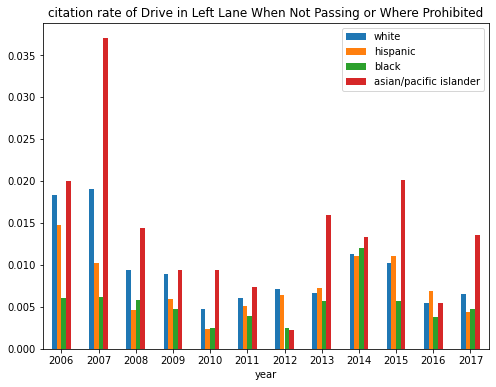

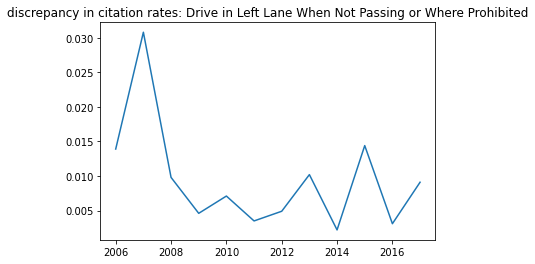

In [ ]:
vis_df = res_df.loc[:, (rate_cols+['violation','year','discrepancy'])]
vis_df.rename(columns = {old_col:new_col for old_col,new_col in zip(rate_cols, cite_cols)}, inplace = True)
for vio in list(vis_df['violation'].unique()):
  print('************************')
  print(vio)
  vio_df = vis_df.loc[vis_df['violation'] == vio,(cite_cols+['year'])]
  vio_df = vio_df.set_index('year')
  ax = vio_df.plot.bar(rot=0, figsize = (8,6))
  ax.set_title(('citation rate of ' + vio))
  plt.legend()
  plt.show()

  rate_diff_df = vis_df.loc[vis_df['violation'] == vio,['violation','year','discrepancy']]
  plt.plot(rate_diff_df['year'], rate_diff_df['discrepancy'])
  plt.title(('discrepancy in citation rates: '+ vio))
  plt.show()

### logistic regression. Each year, filter violation types with citation rate > 90% or citation rate < 5%, run logistic regression.

-> no speeding related violation types, single violation type (eg., not 'speeding over limit | fail to fulfill financial responsibility').

Violation type needs to have >**1000** (can change) records in that year to be included in that year's analysis.

In [ ]:
keep_col = ['county_name', 
            'subject_race',
            'subject_sex',
            'violation', 
            'citation_issued'
            ]
rm_na_col = ['county_name','violation','subject_race','subject_sex']

def remove_empty_rows(df, colName):
	df = df[df[colName] != 'unknown']
	df = df[df[colName].notna()]
	return(df)

def preprocess(year, keep_col, rm_na_col, violation_type):
  """
  if violation_type = 'low': include violation types with citation rate < 0.05
  if violation_type = 'high': include violation types with citation rate > 0.9
  """
  # read dataframe
  filename = '/gdrive/MyDrive/traffic_stop/year_data/traffic_' + str(year) + '.parquet'
  df = pd.read_parquet(filename, engine = 'pyarrow')
  print('# of All traffic stops: ', len(df))

  cnt_df = pd.DataFrame(df['violation'].value_counts(dropna=False))
  # the 1000 threshold can be changed here, I do ot include speeding violations here
  cnt_df = cnt_df.loc[cnt_df['violation'] > 1000]
  single_vio_lst = [vio for vio in list(cnt_df.index) if ('|' not in vio) and ('speed' not in vio.lower())]
  vio_type_lst = []

  for vio in single_vio_lst:
    temp_df = df.loc[df['violation'] == vio,:]
    if violation_type == 'low':
      if (sum(temp_df['citation_issued'] == True)==0) or (temp_df['citation_issued'].value_counts(normalize = True)[True] < 0.05):
        vio_type_lst.append(vio)

    if violation_type == 'high':
      if sum(temp_df['citation_issued'] == True)==0:
        continue
      if temp_df['citation_issued'].value_counts(normalize = True)[True] > 0.9:
        vio_type_lst.append(vio)
  
  df = df.loc[df['violation'].isin(vio_type_lst),:]

  # invalid value
  if year == 2013:
    df.drop(df.index[df['lat'] == 74.052879], inplace=True)

  ## drop unrelated columns
  col_drop = [col for col in df.columns if col not in keep_col]
  df.drop(col_drop, axis = 1, inplace = True)

  # remove rows with missing values in rm_na_col
  for col in rm_na_col:
    df = remove_empty_rows(df, col)

  ## County names are converted to county type - metropolitan, micropolitan or non-core
  # For definitions, see US OMB website

  # read in county info csv
  county_df = pd.read_csv('/gdrive/MyDrive/traffic_stop/2014-2018.csv')
  county_df = county_df[county_df['State']=='Texas']
  county_df = county_df.filter(items=['Metropolitan Status', 'County Name'])

  # transform column
  df['county'] = [name[:-7] for name in df['county_name']]
  df['county'] = df['county'].replace('Dewitt','DeWitt')
  df = df.join(county_df.set_index('County Name'), on='county')
  df.drop('county', axis = 1, inplace=True)
  df.rename(columns={'Metropolitan Status':'county_type'}, inplace=True)

  # Convert 'citation issued' to integer
  df = df.astype({'citation_issued': 'int64'})

  # if race is other/unknown, we delete the rows!
  df = df.loc[(df['subject_race'] != 'unknown') & (df['subject_race'] != 'other'),:]
  df['subject_race'] = df.subject_race.cat.remove_unused_categories()

  print(df['subject_sex'].value_counts(dropna = False))
  print(df['subject_race'].value_counts(dropna = False))
  print(df['county_type'].value_counts(dropna = False))

  print('# of violation type traffic stops: ', len(df))
  return df 

In [ ]:
def run_year_analysis(keep_col, rm_na_col, df_years, violation):
  """
  param:
  if violation = 'low': include violation types with citation rate < 0.05
  if violation = 'high': include violation types with citation rate > 0.9
  Output:
  A result dataframe
  """
  years = list(range(2006, 2018))

  for year in years:
    # read in the data
    print('***********************************')
    print(year)

    # read in and preprocess data
    df = preprocess(year, keep_col, rm_na_col, violation_type = violation)
    if len(df) == 0:
      print('WARNING: ',violation,' has 0 records in ', year, '!!')
      return 0
    y = df['citation_issued']
    X = df.drop('citation_issued', axis = 1)
    X.drop(['county_name','violation'], axis = 1, inplace = True)
    
    # Those columns also contain no useful information. So, we drop those columns
    #for col in X.columns:
      #if len(X.loc[X[col] == 0,:]) == len(X):
        #X.drop(col, axis = 1, inplace = True)
        #print(year, ': ','Delete ', col)
    
    # get dummies for race, sex, daylight,holiday
    X = pd.get_dummies(X)
    #sex_dict = {'male':0, 'female':1}
    #X['subject_sex'] = X['subject_sex'].map(sex_dict)
    # for baseline model
    # Base level: male, White, Metropolitan (county type), holiday = 0
    X.drop(['subject_race_white', 'county_type_Metropolitan','subject_sex_male'], axis = 1, inplace = True)

    #adding constant to X
    X_with_constant = sm.add_constant(X)
    # building the model and fitting the data
    log_reg = sm.Logit(y, X_with_constant).fit()
    
    res_df = pd.DataFrame({'variable':list(log_reg.params.index), 'coef':list(log_reg.params.values), 
                           'odds_ratio':list(np.exp(log_reg.params.values)),
                           'lower_CI':list(np.exp(log_reg.conf_int()[0].values)),
                           'upper_CI':list(np.exp(log_reg.conf_int()[1].values)),'pvalue':list(log_reg.pvalues)})

    df_years = df_years.merge(res_df, left_on = 'variable', right_on = 'variable', how = 'outer')
    df_years = df_years.rename(columns = {'coef': ('coef_' + str(year)), 
                                          'odds_ratio': ('odds_ratio_' + str(year)),
                                          'lower_CI': ('OR_lower_CI_' + str(year)),
                                          'upper_CI': ('OR_upper_CI_' + str(year)), 
                                          'pvalue': ('pvalue_' + str(year))})

    # append race coefs to result list for plotting
    black.append(np.exp(log_reg.params['subject_race_black']))
    hispanic.append(np.exp(log_reg.params['subject_race_hispanic']))
    asianpacific.append(np.exp(log_reg.params['subject_race_asian/pacific islander']))

    # lower CI
    black_low.append(np.exp(log_reg.conf_int()[0]['subject_race_black']))
    hispanic_low.append(np.exp(log_reg.conf_int()[0]['subject_race_hispanic']))
    asianpacific_low.append(np.exp(log_reg.conf_int()[0]['subject_race_asian/pacific islander']))

    # upper CI
    black_high.append(np.exp(log_reg.conf_int()[1]['subject_race_black']))
    hispanic_high.append(np.exp(log_reg.conf_int()[1]['subject_race_hispanic']))
    asianpacific_high.append(np.exp(log_reg.conf_int()[1]['subject_race_asian/pacific islander']))

  return df_years

# write result df to csv file


#### Low citation rate(<0.05) violation types combined

***********************************
2006
# of All traffic stops:  2693894
male      226614
female     82033
Name: subject_sex, dtype: int64
white                     200220
hispanic                   71803
black                      33873
asian/pacific islander      2751
Name: subject_race, dtype: int64
Metropolitan    175728
Non core         75575
Micropolitan     57344
Name: county_type, dtype: int64
# of violation type traffic stops:  308647


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.049034
         Iterations 9
***********************************
2007
# of All traffic stops:  2427347
male      216624
female     76685
Name: subject_sex, dtype: int64
white                     187310
hispanic                   71232
black                      31926
asian/pacific islander      2841
Name: subject_race, dtype: int64
Metropolitan    168403
Non core         71431
Micropolitan     53475
Name: county_type, dtype: int64
# of violation type traffic stops:  293309
Optimization terminated successfully.
         Current function value: 0.051489
         Iterations 9
***********************************
2008
# of All traffic stops:  2526783
male      253510
female     90923
Name: subject_sex, dtype: int64
white                     241357
hispanic                   64622
black                      34627
asian/pacific islander      3827
Name: subject_race, dtype: int64
Metropolitan    180487
Non core         94

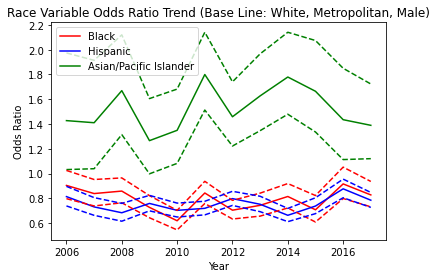

In [ ]:
# columns to store
var_lst_baseline = ['subject_race_black', 'subject_race_hispanic', 'subject_race_asian/pacific islander',
                      'county_type_Non core', 'county_type_Micropolitan','subject_sex_female']

df_years = pd.DataFrame({'variable':var_lst_baseline})

# keep track of coefficient estimates and evaluation metrics
asianpacific = []	
black = []	
hispanic = []	

asianpacific_low = []	
black_low = []	
hispanic_low = []

asianpacific_high = []	
black_high = []	
hispanic_high = []

res_df = run_year_analysis(keep_col = keep_col, rm_na_col = rm_na_col, df_years = df_years, violation='low')

# save csv
file_name = 'ORCI_combined_low.csv'
save_path = '/gdrive/MyDrive/traffic_stop/output_0412/' + file_name
res_df.to_csv(save_path, index = False)

years = list(range(2006, 2018))
sns.lineplot(x = years, y = black, color = 'red', label="Black")
sns.lineplot(x = years, y = hispanic, color = 'blue', label="Hispanic")
sns.lineplot(x = years, y = asianpacific, color = 'green', label="Asian/Pacific Islander")

sns.lineplot(x = years, y = black_low, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_low, color = 'blue', linestyle='--')
sns.lineplot(x = years, y = asianpacific_low, color = 'green', linestyle='--')

sns.lineplot(x = years, y = black_high, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_high, color = 'blue', linestyle='--')
sns.lineplot(x = years, y = asianpacific_high, color = 'green', linestyle='--')

plt.title('Race Variable Odds Ratio Trend (Base Line: White, Metropolitan, Male)')
plt.xlabel('Year')
plt.ylabel('Odds Ratio')
plt.legend()
plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_conbined_low.svg'), format = 'svg')
plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_combined_low.jpg'), dpi = 200)
plt.show()

#### High citation rate(>0.9) violation types combined

***********************************
2006
# of All traffic stops:  2693894
male      101207
female     30625
Name: subject_sex, dtype: int64
white                     84380
hispanic                  31614
black                     15188
asian/pacific islander      650
Name: subject_race, dtype: int64
Metropolitan    83668
Non core        25508
Micropolitan    22656
Name: county_type, dtype: int64
# of violation type traffic stops:  131832


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.024568
         Iterations 10
***********************************
2007
# of All traffic stops:  2427347
male      88746
female    26894
Name: subject_sex, dtype: int64
white                     72495
hispanic                  29368
black                     13185
asian/pacific islander      592
Name: subject_race, dtype: int64
Metropolitan    73948
Non core        21946
Micropolitan    19746
Name: county_type, dtype: int64
# of violation type traffic stops:  115640
Optimization terminated successfully.
         Current function value: 0.021620
         Iterations 10
***********************************
2008
# of All traffic stops:  2526783
male      74058
female    22331
Name: subject_sex, dtype: int64
white                     68068
hispanic                  16831
black                     10971
asian/pacific islander      519
Name: subject_race, dtype: int64
Metropolitan    61765
Non core        17891
Micropolita

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in exp


# of All traffic stops:  1745385
male      20858
female    11870
Name: subject_sex, dtype: int64
white                     13114
hispanic                  11760
black                      7508
asian/pacific islander      346
Name: subject_race, dtype: int64
Metropolitan    25255
Non core         4016
Micropolitan     3457
Name: county_type, dtype: int64
# of violation type traffic stops:  32728
         Current function value: 0.026388
         Iterations: 35
***********************************
2016


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# of All traffic stops:  1832207
male      20298
female     9997
Name: subject_sex, dtype: int64
hispanic                  12762
white                     11289
black                      6030
asian/pacific islander      214
Name: subject_race, dtype: int64
Metropolitan    21873
Non core         4511
Micropolitan     3911
Name: county_type, dtype: int64
# of violation type traffic stops:  30295
         Current function value: 0.045804
         Iterations: 35
***********************************
2017


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# of All traffic stops:  2197382
male      23421
female    11188
Name: subject_sex, dtype: int64
hispanic                  15066
white                     12078
black                      7180
asian/pacific islander      285
Name: subject_race, dtype: int64
Metropolitan    25038
Non core         4934
Micropolitan     4637
Name: county_type, dtype: int64
# of violation type traffic stops:  34609
Optimization terminated successfully.
         Current function value: 0.043445
         Iterations 9


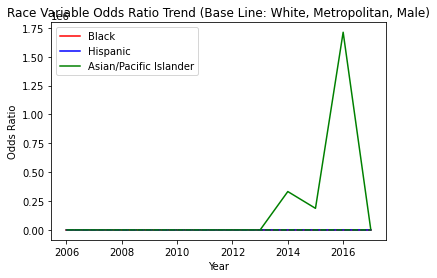

In [ ]:
# columns to store
var_lst_baseline = ['subject_race_black', 'subject_race_hispanic', 'subject_race_asian/pacific islander',
                      'county_type_Non core', 'county_type_Micropolitan','subject_sex_female']

df_years = pd.DataFrame({'variable':var_lst_baseline})

# keep track of coefficient estimates and evaluation metrics
asianpacific = []	
black = []	
hispanic = []	

asianpacific_low = []	
black_low = []	
hispanic_low = []

asianpacific_high = []	
black_high = []	
hispanic_high = []

res_df = run_year_analysis(keep_col = keep_col, rm_na_col = rm_na_col, df_years = df_years, violation='high')

# save csv
file_name = 'ORCI_combined_high.csv'
save_path = '/gdrive/MyDrive/traffic_stop/output_0412/' + file_name
res_df.to_csv(save_path, index = False)

years = list(range(2006, 2018))
sns.lineplot(x = years, y = black, color = 'red', label="Black")
sns.lineplot(x = years, y = hispanic, color = 'blue', label="Hispanic")
sns.lineplot(x = years, y = asianpacific, color = 'green', label="Asian/Pacific Islander")

sns.lineplot(x = years, y = black_low, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_low, color = 'blue', linestyle='--')
sns.lineplot(x = years, y = asianpacific_low, color = 'green', linestyle='--')

sns.lineplot(x = years, y = black_high, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_high, color = 'blue', linestyle='--')
sns.lineplot(x = years, y = asianpacific_high, color = 'green', linestyle='--')

plt.title('Race Variable Odds Ratio Trend (Base Line: White, Metropolitan, Male)')
plt.xlabel('Year')
plt.ylabel('Odds Ratio')
plt.legend()
plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_conbined_high.svg'), format = 'svg')
plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_combined_high.jpg'), dpi = 200)
plt.show()

In [ ]:
print('black: ',black)
print('asianpacific: ',asianpacific)
print('hispanic: ',hispanic)

black:  [0.672755206132109, 0.69628139175467, 0.7181134005112145, 1.139142494818368, 1.2873219613094506, 1.0108367627003825, 0.6826453001798919, 0.8798203725228323, 0.5592748051533711, 1.1043408610662593, 1.196099085372404, 1.3163494648508367]
asianpacific:  [1.0072174484449918, 1.6306816068166903, 0.6538331500764966, 1.2338993800433653, 0.9526296784502803, 0.2865583097567279, 1.1848109959002158, 0.5192601412714182, 332250.2949988493, 186860.18063438268, 1711814.791562044, 0.9355666130072327]
hispanic:  [0.5605148215708541, 0.668811803260428, 0.5178631095691814, 1.6798168061239804, 0.835188312967545, 0.5331750013714024, 0.5171433578081202, 0.6860646285278835, 0.29134247248156075, 0.33581613199228366, 0.5710793399782277, 0.7703502148246687]


In [ ]:
asianpacific[:-4]

[1.0072174484449918,
 1.6306816068166903,
 0.6538331500764966,
 1.2338993800433653,
 0.9526296784502803,
 0.2865583097567279,
 1.1848109959002158,
 0.5192601412714182]

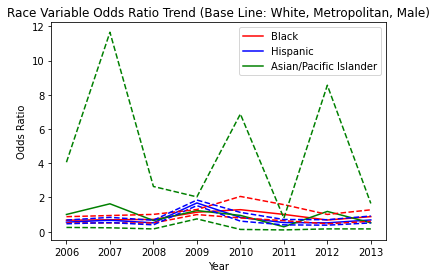

In [ ]:
years = list(range(2006, 2014))
black1 = black[:-4]
asianpacific1 = asianpacific[:-4]
hispanic1 = hispanic[:-4]

black_low1 = black_low[:-4]
asianpacific_low1 = asianpacific_low[:-4]
hispanic_low1 = hispanic_low[:-4]

black_high1 = black_high[:-4]
asianpacific_high1 = asianpacific_high[:-4]
hispanic_high1 = hispanic_high[:-4]

sns.lineplot(x = years, y = black1, color = 'red', label="Black")
sns.lineplot(x = years, y = hispanic1, color = 'blue', label="Hispanic")
sns.lineplot(x = years, y = asianpacific1, color = 'green', label="Asian/Pacific Islander")

sns.lineplot(x = years, y = black_low1, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_low1, color = 'blue', linestyle='--')
sns.lineplot(x = years, y = asianpacific_low1, color = 'green', linestyle='--')

sns.lineplot(x = years, y = black_high1, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_high1, color = 'blue', linestyle='--')
sns.lineplot(x = years, y = asianpacific_high1, color = 'green', linestyle='--')

plt.title('Race Variable Odds Ratio Trend (Base Line: White, Metropolitan, Male)')
plt.xlabel('Year')
plt.ylabel('Odds Ratio')
plt.legend()
#plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_conbined_high.svg'), format = 'svg')
#plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_combined_high.jpg'), dpi = 200)
plt.show()

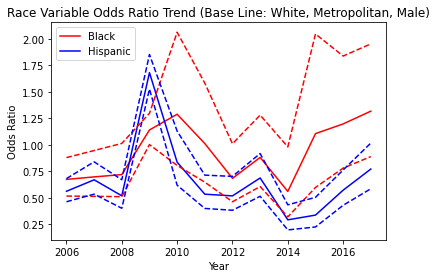

In [ ]:
years = list(range(2006, 2018))
sns.lineplot(x = years, y = black, color = 'red', label="Black")
sns.lineplot(x = years, y = hispanic, color = 'blue', label="Hispanic")
#sns.lineplot(x = years, y = asianpacific, color = 'green', label="Asian/Pacific Islander")

sns.lineplot(x = years, y = black_low, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_low, color = 'blue', linestyle='--')
#sns.lineplot(x = years, y = asianpacific_low, color = 'green', linestyle='--')

sns.lineplot(x = years, y = black_high, color = 'red', linestyle='--')
sns.lineplot(x = years, y = hispanic_high, color = 'blue', linestyle='--')
#sns.lineplot(x = years, y = asianpacific_high, color = 'green', linestyle='--')

plt.title('Race Variable Odds Ratio Trend (Base Line: White, Metropolitan, Male)')
plt.xlabel('Year')
plt.ylabel('Odds Ratio')
plt.legend()
plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_conbined_high.svg'), format = 'svg')
plt.savefig(('/gdrive/MyDrive/traffic_stop/output_0412/'+'ORCI_combined_high.jpg'), dpi = 200)
plt.show()

#### IGnore below

In [ ]:
len([vio for vio in top_vios if ('|' not in vio) and ('speed' not in vio.lower())])

27

In [ ]:
[vio for vio in top_vios if ('|' not in vio) and ('speed' not in vio.lower())]

['Operate Motor Vehicle Without License Plates (Or With One Plate)',
 'No/Non-Compliant Head Lamps (#)',
 'Display Expired License Plates/Registration (#)',
 'No/Improper License Plate Lamp',
 'Improperly Placed Or Obstructed License Plate (#)',
 'Operate Motor Vehicle in Violation of FMVSS 571.108',
 'Ride, Not Secured By Safety Belt-Driver (12-1-85) (#)',
 'Inoperable/Obscured Stop Lamp(s) (#)',
 'Drive in Left Lane When Not Passing or Where Prohibited',
 'No/Improper Tail Lamp - not Motorcycle',
 'Ride, Not Secured By Safety Belt-Passenger (When Required)',
 'Fail To Signal Lane Change',
 'Following Too Closely',
 'Disregard Stop Sign (#)',
 'Drive On Improved Shoulder When Prohibited',
 'Use Of Vision Reducing Matter On Windows - Glass Coating Material',
 'Failure to Pay Toll (For NTTA Use Only)',
 'Fail To Drive In Single Lane (#)',
 'No/Improper Mud Flap',
 'Fail to Move Over or Slow Down for Certain Vehicles',
 'Drive Without Lights-when Required',
 'Disregard Red Light-traffic 